Accuracy: 0.7281
Precision: 0.1457
Recall: 0.8302
F1 Score: 0.2479


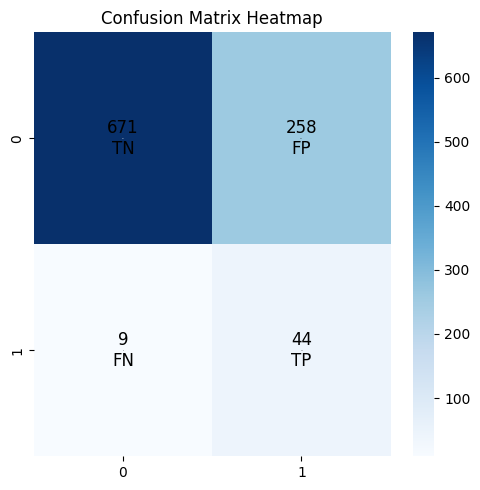

In [5]:
import numpy as np
from metrics_module import metrics
from graphs_module import plot_roc_auc

# Carregar les prediccions de cada model des de la carpeta 'predictions'
predictions_logistic_reg = np.load('predictions/predictions_logistic_regression.npy')
predictions_random_forest = np.load('predictions/predictions_random_forest.npy')
predictions_naive_bayes = np.load('predictions/predictions_naive_bayes.npy')
predictions_knn = np.load('predictions/predictions_knn.npy')
predictions_adaboost = np.load('predictions/predictions_adaboost.npy')
predictions_xgboost = np.load('predictions/predictions_xgboost.npy')

# Carregar les etiquetes reals des de la carpeta 'predictions'
y_test = np.load('predictions/y_test.npy')

# Combinar les prediccions utilitzant votació majoritària
combined_predictions = np.round((predictions_logistic_reg + predictions_random_forest + predictions_naive_bayes + predictions_knn + predictions_adaboost + predictions_xgboost) / 6).astype(int)

# Guardar les prediccions en un fitxer .npy
np.save('predictions/predictions_ensemble.npy', combined_predictions)

# Avaluar el model
results = metrics(y_test, combined_predictions, print_metrics=True)
accuracy, precision, recall, f1, roc_auc = results

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc(y_test, y_prob, model_name="Ensemble Model"):
    """
    Genera la ROC Curve per a qualsevol model

    Parametres:
    - y_test: Etiquetes de test.
    - y_prob: Probabilitats de predicció del model.
    - model_name: Etiqueta del model que es mostrarà al gràfic

    Sortida:
    - ROC Curve i AUC score
    """
    # Carpeta per guardar els resultats
    output_dir = "ROC_Data"
    os.makedirs(output_dir, exist_ok=True) 

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Guardar els arrays
    np.save(os.path.join(output_dir, f"{model_name}_fpr.npy"), fpr)
    np.save(os.path.join(output_dir, f"{model_name}_tpr.npy"), tpr)
    np.save(os.path.join(output_dir, f"{model_name}_thresholds.npy"), thresholds)
    np.save(os.path.join(output_dir, f"{model_name}_auc.npy"), np.array([auc_score]))
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.title(f'ROC Curve: {model_name}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    print(f"{model_name} AUC Score: {auc_score:.2f}")
